**Biblioteca**

In [ ]:
import pandas as pd
from datetime import datetime
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')                 # Eliminar mensagens

# Exemplo Email

**Importando os dados**

In [ ]:
email = pd.read_csv("emails.csv")
donations = pd.read_csv("donations.csv")
year_Joined = pd.read_csv("year_Joined.csv")

In [ ]:
email.head()

,emailsOpened,user,week
0,3.0,1.0,2015-06-29 00:00:00
1,2.0,1.0,2015-07-13 00:00:00
2,2.0,1.0,2015-07-20 00:00:00
3,3.0,1.0,2015-07-27 00:00:00
4,1.0,1.0,2015-08-03 00:00:00


In [ ]:
donations.head()

,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0
3,50.0,2016-07-06 12:24:55,0.0
4,50.0,2016-05-11 18:13:04,1.0


In [ ]:
year_Joined.head()

,user,userStats,yearJoined
0,0,silver,2014
1,1,silver,2015
2,2,silver,2016
3,3,bronze,2018
4,4,silver,2018


**PERGUNTA:** Na variavel "year_Joined", se o STATUS é referente o ANUAL ou o mais RECENTE, em suma, atual ou histórico.

In [ ]:
# Eu faria assim.
criterio_valor = year_Joined.shape[0] - year_Joined.drop_duplicates("user").shape[0]
if criterio_valor == 0:
    print("Os valores se refere-se ao valores atuais de cada usuário.")
else:
    print("Os valores se refere-se ao valores histórico de cada usuário.")

Os valores se refere-se ao valores atuais de cada usuário.


In [ ]:
# Livro
year_Joined.groupby("user").count().groupby("userStats").count()

,yearJoined
userStats,
1,1000


**Verificar:** se ouve semanas que não foram enviados email.

In [ ]:
# Com base nessa resposta, temos duas duvidas, será que todas as semanas foram enviados emails, ou será que essa informação não está presente?

email.loc[email.emailsOpened < 1]

,emailsOpened,user,week


In [ ]:
# Aqui sabemos que eles enviaram para todas semanas emails, mas não sabemos que o usuario X, teve o envio de todas semanas.
from datetime import datetime
dif_data = datetime.strptime(email.week.max(), '%Y-%m-%d %H:%M:%S') - datetime.strptime(email.week.min(), '%Y-%m-%d %H:%M:%S')
print("Valor diferente do max e min das datas {}".format((dif_data.days/7) + 1))
print("Valor com base nos valores unicos {}".format(email[["week"]].drop_duplicates().shape[0]))

Valor diferente do max e min das datas 173.0
Valor com base nos valores unicos 173


In [ ]:
# Só precisamos saber se sim ou não. Então vamos escolher o usuario e confirmar, bastando apenas um que não foi.
minimo = email.groupby("user").min()
maximo = email.groupby("user").max()

for id in email.user.unique():
    dif_data = datetime.strptime(minimo.loc[id]["week"], '%Y-%m-%d %H:%M:%S') - datetime.strptime(maximo.loc[id]["week"], '%Y-%m-%d %H:%M:%S')
    dif_data = (abs(dif_data.days) / 7) + 1
    via_shape = email.loc[email.user == id][["week"]].drop_duplicates().shape[0]
    if dif_data != via_shape:
        print(id)
        break
else:
    print("Dados 100% preenchido.")

1.0


In [ ]:
# Percebemos que o usuario 1 tem data diferente, vamos verificar.
email.loc[email.user == 1].week.unique()[:2]

array(['2015-06-29 00:00:00', '2015-07-13 00:00:00'], dtype=object)

*Conclusão: A tabela, não informa se a semana não foi enviado email, apenas as semanas que foram enviados.*

**Resolvendo:** Agora vamos colocar as semanas que estão faltando na nossa base.

In [ ]:
completar_id = pd.MultiIndex.from_product((set(email.week), set(email.user)))
completar_id

MultiIndex([('2016-01-11 00:00:00',   1.0),
            ('2016-01-11 00:00:00',   3.0),
            ('2016-01-11 00:00:00',   5.0),
            ('2016-01-11 00:00:00',   6.0),
            ('2016-01-11 00:00:00',   9.0),
            ('2016-01-11 00:00:00',  10.0),
            ('2016-01-11 00:00:00',  14.0),
            ('2016-01-11 00:00:00',  16.0),
            ('2016-01-11 00:00:00',  20.0),
            ('2016-01-11 00:00:00',  21.0),
            ...
            ('2017-07-24 00:00:00', 973.0),
            ('2017-07-24 00:00:00', 977.0),
            ('2017-07-24 00:00:00', 982.0),
            ('2017-07-24 00:00:00', 984.0),
            ('2017-07-24 00:00:00', 987.0),
            ('2017-07-24 00:00:00', 991.0),
            ('2017-07-24 00:00:00', 992.0),
            ('2017-07-24 00:00:00', 993.0),
            ('2017-07-24 00:00:00', 995.0),
            ('2017-07-24 00:00:00', 998.0)],
           length=93247)

In [ ]:
# Base concluida
todos_email= email.set_index(["week", "user"]).reindex(completar_id, fill_value = 0).reset_index()
todos_email.columns = ["week", "user", "emailsOpened"]
todos_email

,week,user,emailsOpened
0,2016-01-11 00:00:00,1.0,3.0
1,2016-01-11 00:00:00,3.0,0.0
2,2016-01-11 00:00:00,5.0,0.0
3,2016-01-11 00:00:00,6.0,0.0
4,2016-01-11 00:00:00,9.0,0.0
...,...,...,...
93242,2017-07-24 00:00:00,991.0,0.0
93243,2017-07-24 00:00:00,992.0,0.0
93244,2017-07-24 00:00:00,993.0,0.0
93245,2017-07-24 00:00:00,995.0,0.0


In [ ]:
#Verificando
minimo = todos_email.groupby("user").min()
maximo = todos_email.groupby("user").max()

for id in todos_email.user.unique():
    dif_data = datetime.strptime(minimo.loc[id]["week"], '%Y-%m-%d %H:%M:%S') - datetime.strptime(maximo.loc[id]["week"], '%Y-%m-%d %H:%M:%S')
    dif_data = (abs(dif_data.days) / 7) + 1
    via_shape = todos_email.loc[todos_email.user == id][["week"]].drop_duplicates().shape[0]
    if dif_data != via_shape:
        print(id)
        break
else:
    print("Dados 100% preenchido.")

Dados 100% preenchido.


**Arrumando:** Do jeito que está os dados agora, todo semana, tem o usuario, mas, não necessariamente o usuario estava no banco nesse perido.

In [ ]:
min_max_user = email.groupby("user").week.agg(["min", "max"]).reset_index()
min_max_user.head()

,user,min,max
0,1.0,2015-06-29 00:00:00,2018-05-28 00:00:00
1,3.0,2018-03-05 00:00:00,2018-04-23 00:00:00
2,5.0,2017-06-05 00:00:00,2018-05-28 00:00:00
3,6.0,2016-12-05 00:00:00,2018-05-28 00:00:00
4,9.0,2016-07-18 00:00:00,2018-05-28 00:00:00


In [ ]:
for _, id in min_max_user.iterrows():
    usuario = id["user"]
    comeco = id["min"]
    fim= id["max"]

    todos_email.drop(todos_email.loc[(todos_email.user == usuario) & ((todos_email.week < comeco) | (todos_email.week > fim))].index, inplace = True)

todos_email.head()

,week,user,emailsOpened
0,2016-01-11 00:00:00,1.0,3.0
13,2016-01-11 00:00:00,31.0,3.0
14,2016-01-11 00:00:00,33.0,3.0
15,2016-01-11 00:00:00,34.0,3.0
16,2016-01-11 00:00:00,38.0,2.0


**PARTINDO PARA AS DOAÇÕES:** Queremos juntar as duas bases.

- Já que a variável "email" está relacionada à semana e a variável "doações" está relacionada ao dia, irei criar uma coluna denominada "ANO - Semana do ano" para consolidar essas informações.

- Decidimos que a semana terá início às segundas-feiras.

- Em resumo, agora temos uma base de dados que contém os valores de "email" e "doações", bem como todas as semanas do ano, mesmo aquelas em que não houve atividade registrada.

In [ ]:
donations.head()

,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0
3,50.0,2016-07-06 12:24:55,0.0
4,50.0,2016-05-11 18:13:04,1.0


In [ ]:
donations["timestamp"] = donations["timestamp"].apply(lambda X: datetime.strptime(str(X).split(" ")[0], '%Y-%m-%d'))
donations["ANO - Semana do ano"] = donations["timestamp"].apply(lambda X: str(X).split("-")[0] + " - " + X.strftime("%W"))
donations.head()

,amount,timestamp,user,ANO - Semana do ano
0,25.0,2017-11-12,0.0,2017 - 45
1,50.0,2015-08-25,0.0,2015 - 34
2,25.0,2015-03-26,0.0,2015 - 12
3,50.0,2016-07-06,0.0,2016 - 27
4,50.0,2016-05-11,1.0,2016 - 19


In [ ]:
todos_email["week"] = todos_email["week"].apply(lambda X: datetime.strptime(str(X).split(" ")[0], '%Y-%m-%d'))
todos_email["ANO - Semana do ano"] = todos_email["week"].apply(lambda X: str(X).split("-")[0] + " - " + X.strftime("%W"))
donations.head()

,amount,timestamp,user,ANO - Semana do ano
0,25.0,2017-11-12,0.0,2017 - 45
1,50.0,2015-08-25,0.0,2015 - 34
2,25.0,2015-03-26,0.0,2015 - 12
3,50.0,2016-07-06,0.0,2016 - 27
4,50.0,2016-05-11,1.0,2016 - 19


In [ ]:
#Realizando um MERGE nos meses e ID dos usuarios
todos_email.set_index(["ANO - Semana do ano", "user"], inplace = True)
donations.set_index(["ANO - Semana do ano", "user"], inplace = True)

df = pd.merge(donations, todos_email, left_index=True, right_index=True, how='outer').reset_index()[["user", "ANO - Semana do ano", "amount", "emailsOpened"]]
df.head(10)

,user,ANO - Semana do ano,amount,emailsOpened
0,10.0,2015 - 06,NaN,3.0
1,31.0,2015 - 06,NaN,2.0
2,38.0,2015 - 06,NaN,1.0
3,54.0,2015 - 06,NaN,3.0
4,83.0,2015 - 06,NaN,1.0
5,95.0,2015 - 06,NaN,2.0
6,134.0,2015 - 06,25.0,NaN
7,135.0,2015 - 06,NaN,1.0
8,155.0,2015 - 06,NaN,1.0
9,174.0,2015 - 06,25.0,2.0


In [ ]:
df.loc[df.user == 998]

,user,ANO - Semana do ano,amount,emailsOpened
23736,998.0,2017 - 49,NaN,1.0
24075,998.0,2017 - 50,NaN,3.0
24420,998.0,2017 - 51,NaN,3.0
24775,998.0,2017 - 52,NaN,0.0
25129,998.0,2018 - 01,50.0,3.0
25502,998.0,2018 - 02,NaN,3.0
25869,998.0,2018 - 03,NaN,2.0
26237,998.0,2018 - 04,NaN,3.0
26617,998.0,2018 - 05,NaN,2.0
26989,998.0,2018 - 06,NaN,3.0


**DESCROBRINDO O DELTA TIME NOS TEMPOS**

In [ ]:
donations = donations.reset_index()
donations = donations.sort_values(by=['user', 'timestamp'], ascending=[True, True])
donations.index = [i for i in range(donations.shape[0])]
donations.head()

,ANO - Semana do ano,user,amount,timestamp
0,2015 - 12,0.0,25.0,2015-03-26
1,2015 - 34,0.0,50.0,2015-08-25
2,2016 - 27,0.0,50.0,2016-07-06
3,2017 - 45,0.0,25.0,2017-11-12
4,2016 - 18,1.0,50.0,2016-05-05


In [ ]:
donations["tempo_D-1"] = donations["timestamp"] - donations["timestamp"].shift(-1)
donations.head()

,ANO - Semana do ano,user,amount,timestamp,tempo_D-1
0,2015 - 12,0.0,25.0,2015-03-26,-152 days
1,2015 - 34,0.0,50.0,2015-08-25,-316 days
2,2016 - 27,0.0,50.0,2016-07-06,-494 days
3,2017 - 45,0.0,25.0,2017-11-12,556 days
4,2016 - 18,1.0,50.0,2016-05-05,-6 days


In [ ]:
donations["tempo_D-1"] = (donations["timestamp"] - donations["timestamp"].shift(1)).dt.days

usuario_memorio = None
for id in donations.index:
    usuario = donations["user"][id]

    if usuario_memorio != usuario:
        usuario_memorio = usuario
        donations["tempo_D-1"][id] = None

In [ ]:
donations.head(10)

,ANO - Semana do ano,user,amount,timestamp,tempo_D-1
0,2015 - 12,0.0,25.0,2015-03-26,NaN
1,2015 - 34,0.0,50.0,2015-08-25,152.0
2,2016 - 27,0.0,50.0,2016-07-06,316.0
3,2017 - 45,0.0,25.0,2017-11-12,494.0
4,2016 - 18,1.0,50.0,2016-05-05,NaN
5,2016 - 19,1.0,50.0,2016-05-11,6.0
6,2017 - 04,1.0,75.0,2017-01-23,257.0
7,2016 - 11,2.0,25.0,2016-03-15,NaN
8,2016 - 23,2.0,25.0,2016-06-07,84.0
9,2017 - 27,2.0,50.0,2017-07-04,392.0


In [ ]:
import plotly.graph_objects as go

# Criar o histograma com o Plotly
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=donations["tempo_D-1"],
    nbinsx=15,  # Número de bins do histograma
    histnorm='probability',  # Normalização para probabilidade
    name='Deltatime de doação',  # Nome do histograma
    marker=dict(color='rgb(153, 12, 12)'),  # Cor das barras do histograma
    opacity=0.95,  # Opacidade das barras do histograma
    textposition='outside',  # Posição do texto (fora das barras)
    texttemplate='%{y:.2%}',  # Template para o texto (porcentagem)
    textfont=dict(color='rgb(0, 0, 0)'),
))

# Configurar layout do gráfico
fig.update_layout(
    title='Intervalo de doações em relação ao mesmo usuário',  # Título do gráfico
    xaxis_title='Dias',  # Título do eixo x
    yaxis_title='Probabilidade',  # Título do eixo y
    showlegend=True,  # Mostrar a legenda
    bargap=0.2,  # Espaço entre as barras do histograma
    bargroupgap=0.1,  # Espaço entre os grupos de barras do histograma
    yaxis=dict(showticklabels=False  # Oculta os rótulos do eixo Y
    )
)

# Exibir o gráfico
fig.show()

#Suavização

In [ ]:
df_air = pd.read_csv("/content/AirPassengers.csv")
df_air.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


##Suavização exponencial
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [ ]:
#Exponentially Weighted Moving Averages (EWMA)
df_air["Smooth.5"]= df_air["Passengers"].ewm(alpha= 0.5).mean()
df_air["Smooth.9"]= df_air["Passengers"].ewm(alpha= 0.9).mean()

df_air

,Date,Passengers,Smooth.5,Smooth.9
0,1949-01,112,112.000000,112.000000
1,1949-02,118,116.000000,117.454545
2,1949-03,132,125.142857,130.558559
3,1949-04,129,127.200000,129.155716
4,1949-05,121,124.000000,121.815498
...,...,...,...,...
139,1960-08,606,582.096411,606.665454
140,1960-09,508,545.048205,517.866545
141,1960-10,461,503.024103,466.686655
142,1960-11,390,446.512051,397.668665


In [ ]:
df_air_manipulado= pd.melt(df_air, id_vars=['Date'], value_vars=["Passengers", "Smooth.5",	"Smooth.9"])
df_air_manipulado

,Date,variable,value
0,1949-01,Passengers,112.000000
1,1949-02,Passengers,118.000000
2,1949-03,Passengers,132.000000
3,1949-04,Passengers,129.000000
4,1949-05,Passengers,121.000000
...,...,...,...
427,1960-08,Smooth.9,606.665454
428,1960-09,Smooth.9,517.866545
429,1960-10,Smooth.9,466.686655
430,1960-11,Smooth.9,397.668665


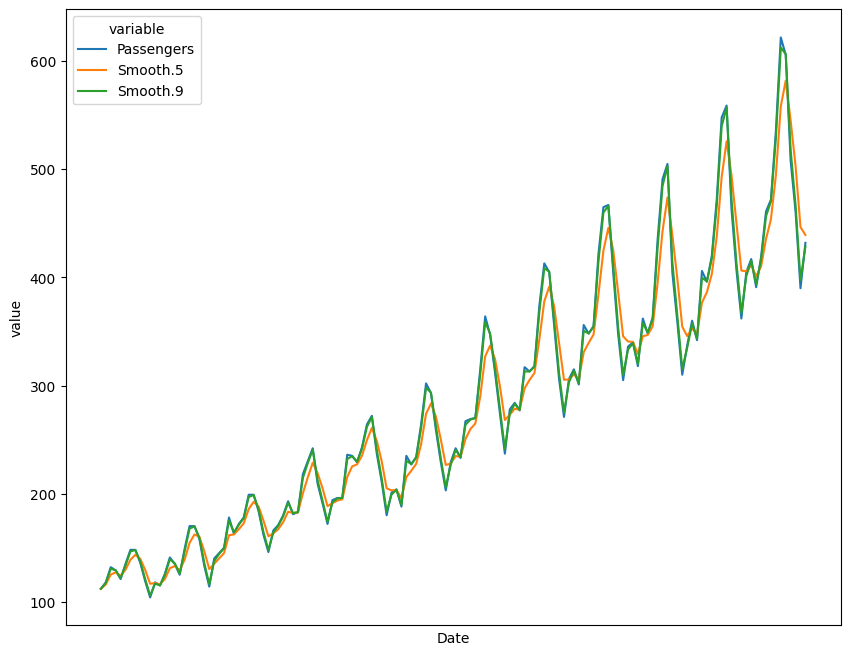

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_air_manipulado, x= "Date", y= "value", hue= "variable")

plt.xticks([])
plt.show()

## LOESS

In [ ]:
import statsmodels.api as sm

In [ ]:
lowess = sm.nonparametric.lowess(df_air["Passengers"], df_air.index, frac=0.2)
lowess[:10]

array([[  0.        , 121.98637193],
       [  1.        , 122.84305504],
       [  2.        , 123.71387099],
       [  3.        , 124.60773377],
       [  4.        , 125.53255437],
       [  5.        , 126.49540411],
       [  6.        , 127.50355543],
       [  7.        , 128.56141026],
       [  8.        , 129.66611204],
       [  9.        , 130.80403938]])

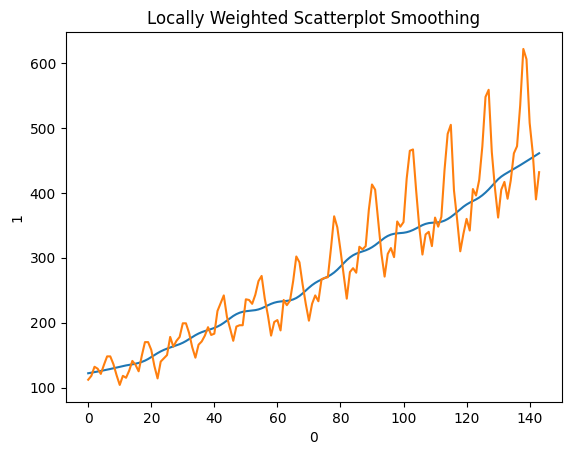

In [ ]:
sns.lineplot(data=pd.DataFrame(lowess), x= 0, y= 1)
sns.lineplot(data=df_air["Passengers"])

plt.title("Locally Weighted Scatterplot Smoothing")
plt.show()

#Decomposição dos dados

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

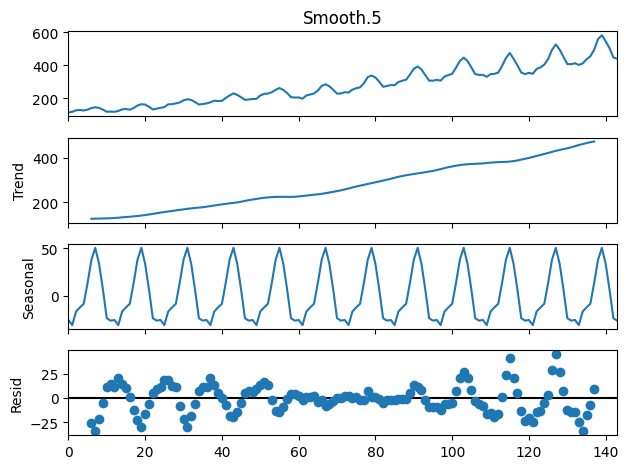

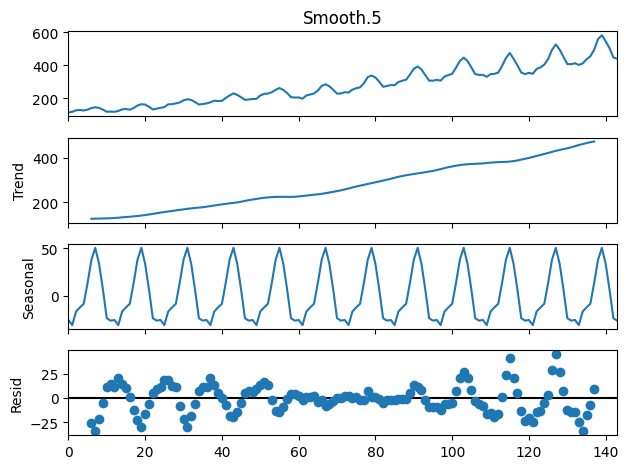

In [ ]:
result= seasonal_decompose(df_air["Smooth.5"], model='additive', period=12)
result.plot()

# Fusos Horários

- Problema principal dos fusos horario são o horario de verão


In [ ]:
import datetime

In [ ]:
#É semelhante now(), mas retorna a data e hora UTC atuais, como um datetimeobjeto ingênuo. Uma data e hora UTC atual pode ser obtida chamando datetime.now(timezone.utc)
datetime.datetime.utcnow()

datetime.datetime(2023, 9, 4, 11, 31, 42, 223317)

In [ ]:
datetime.datetime.now()

datetime.datetime(2023, 9, 4, 11, 31, 43, 59254)

In [ ]:
datetime.datetime.now(datetime.timezone.utc)

datetime.datetime(2023, 9, 4, 11, 34, 25, 511496, tzinfo=datetime.timezone.utc)

In [ ]:
import pytz
london_tz = pytz.timezone("Europe/London")
london_tz.zone

'Europe/London'

In [ ]:
loc_dt = london_tz.localize(datetime.datetime.now())
loc_dt

datetime.datetime(2023, 9, 4, 11, 39, 15, 776257, tzinfo=<DstTzInfo 'Europe/London' BST+1:00:00 DST>)

In [ ]:
f = "%d-%m-%Y %H:%M:%S %Z%z"
datetime.datetime(2023, 9, 4, 11, 34, 25, 511496, tzinfo = london_tz).strftime(f)

'04-09-2023 11:34:25 LMT-0001'

In [ ]:
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi